In [6]:
import sys
import os

# Append the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [7]:
from src.decision_tree import DecisionNode, ChanceNode
from src.analysis import calculate_icer
from src.visualization import plot_decision_tree

Matplotlib is building the font cache; this may take a moment.


In [8]:
# Create decision node
treatment_choice = DecisionNode('Treatment Choice')

In [9]:
# Option 1: Standard Treatment
standard_treatment = ChanceNode('Standard Treatment', probability=1.0, cost=1000, utility=0)
# Outcomes
success_std = ChanceNode('Success', probability=0.7, cost=0, utility=0.8)
failure_std = ChanceNode('Failure', probability=0.3, cost=5000, utility=0.3)
standard_treatment.add_next_node(success_std)
standard_treatment.add_next_node(failure_std)

In [10]:
# Option 2: New Treatment
new_treatment = ChanceNode('New Treatment', probability=1.0, cost=2000, utility=0)
# Outcomes
success_new = ChanceNode('Success', probability=0.85, cost=0, utility=0.9)
failure_new = ChanceNode('Failure', probability=0.15, cost=7000, utility=0.2)
new_treatment.add_next_node(success_new)
new_treatment.add_next_node(failure_new)

In [11]:
# Add branches to the decision node
treatment_choice.add_branch(standard_treatment)
treatment_choice.add_branch(new_treatment)

In [12]:
# Calculate expected values
cost_std, utility_std = standard_treatment.expected_values()
cost_new, utility_new = new_treatment.expected_values()

In [13]:
print(f"Standard Treatment - Expected Cost: ${cost_std:.2f}, Expected Utility: {utility_std:.2f}")
print(f"New Treatment - Expected Cost: ${cost_new:.2f}, Expected Utility: {utility_new:.2f}")

Standard Treatment - Expected Cost: $2500.00, Expected Utility: 0.65
New Treatment - Expected Cost: $3050.00, Expected Utility: 0.80


In [14]:
# Calculate ICER
icer = calculate_icer(cost_std, utility_std, cost_new, utility_new)
print(f"ICER of New Treatment over Standard Treatment: ${icer:.2f} per additional utility")

ICER of New Treatment over Standard Treatment: $3793.10 per additional utility


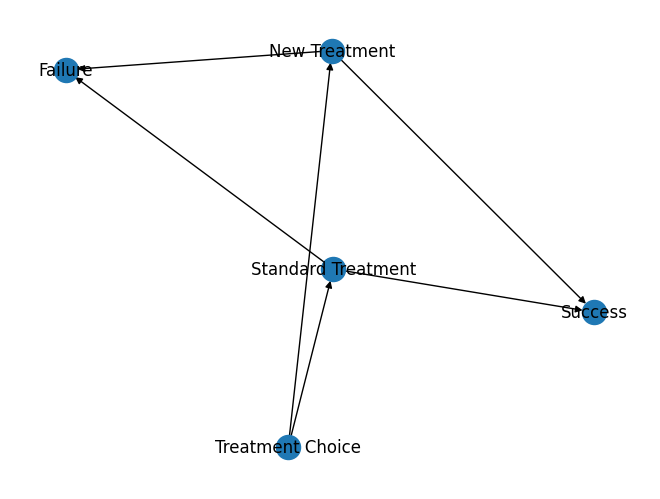

In [15]:
# Visualize the decision tree
plot_decision_tree(treatment_choice)